In [296]:
%matplotlib inline
import pandas as pd
import numpy as np 
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from collections import defaultdict, Counter

# Problem 1

In [297]:
df = pd.read_csv('data1.csv')

In [298]:
df.head()

,download_app,first_purchase,purchases
0,2014-11-22,8,3
1,2015-01-19,6,2
2,2014-12-26,9,1
3,2014-12-10,5,1
4,2014-12-07,7,3


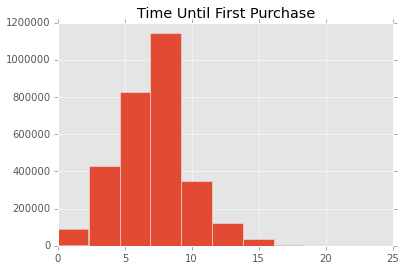

In [342]:
hist = df.hist(column='first_purchase')
plt.title("Time Until First Purchase")
plt.show(hist)

In [276]:
df['first_purchase'].describe()

count    3000000.000000
mean           6.997638
std            2.645907
min            0.000000
25%            5.000000
50%            7.000000
75%            9.000000
max           23.000000
Name: first_purchase, dtype: float64

*This plot gives us a general idea of the time until first purchase. 
We see that mean time until first purchase is apprx 7 days. 
We also see the quartiles. 75% of first purchases are made within 9 days, with a max of 23 days
contributing to a long tail on this distribution.*

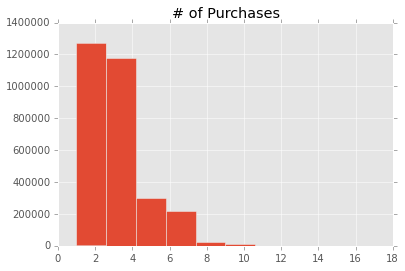

In [343]:
hist = df.hist(column='purchases')
plt.title('# of Purchases')
plt.show(hist)

In [301]:
df['purchases'].describe()

count    3000000.000000
mean           3.048680
std            1.657021
min            1.000000
25%            2.000000
50%            3.000000
75%            4.000000
max           17.000000
Name: purchases, dtype: float64

*This looks slightly exponential,  but that wouldn't quite make sense given that our data is best described as discrete. Also, I ran tests with qqplots that indicate this is not exponential. *
> "mean # of purchases made by a given person over some time period"

*That sounds very Poissonic! Let us try and test the goodness of fit of a Poisson distribution with Lambda = 3*

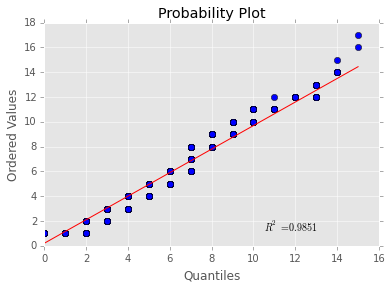

In [302]:
#let's make a qunatile-quantile plot
purchases = df['purchases'].values
fig = stats.probplot(purchases, dist=stats.poisson, sparams=(3,), plot=plt)
plt.show(fig)

*We get a solid R-Squared here. We should be able to expect this data to obey a Poisson Distribution.*

In [303]:
df['download_month'] = df['download_app'].str.slice(start=0,stop=7)

In [304]:
df.head()

,download_app,first_purchase,purchases,download_month
0,2014-11-22,8,3,2014-11
1,2015-01-19,6,2,2015-01
2,2014-12-26,9,1,2014-12
3,2014-12-10,5,1,2014-12
4,2014-12-07,7,3,2014-12


In [305]:
data = df.groupby('download_month')['first_purchase'].mean()

In [306]:
data.head()

download_month
2014-11    6.999285
2014-12    6.996633
2015-01    6.997010
Name: first_purchase, dtype: float64

*Surprisingly, the mean time to first purchase is not decreasing by a noticeable amount with time. This should be a key metric that tracks the performance/effectiveness of the app. We should incorporate new features, change UX, or create new engagement strategies to try to reduce this time*

In [307]:
df[df['download_month'] == '2015-01'].describe()

,first_purchase,purchases
count,966973.000000,966973.000000
mean,6.997010,3.048041
std,2.644624,1.655234
min,0.000000,1.000000
25%,5.000000,2.000000
50%,7.000000,3.000000
75%,9.000000,4.000000
max,23.000000,14.000000


*By changing the download_month above, we see that downloads per month are uniformly across the three month time period. In other words, counts for each month are roughly the same, and not growing. Ideally, we would like to see some linear growth each month and strategize on how to do so*

In [308]:
purchases_data = df.groupby('download_month')['purchases'].mean()

In [309]:
purchases_data.head()

download_month
2014-11    3.049155
2014-12    3.048819
2015-01    3.048041
Name: purchases, dtype: float64

*We can also see that mean numer of purchases made by a user who downloaded in a given month is also roughly uniform. The downward trend is negligible. However, if we assume that the data for number of purchases ends in January, then mean purchases per month is actually increasing from about 1 in november to about 3 in January. However, this is bittersweet because this also means that the users who download in November and December are purchasing at a lower rate and less engaged. This may also imply that people make purchases after first downloading the app and with time, become less engaged. Either way there is room for improvement with customer engagement* 

*If we had a dataset of purchase dates instead of download dates, we could plot the cumsum of purhcases with time, and analyze the rates of change, and look for purchasing spikes.*

# Problem 2

In [310]:
sale_data = pd.read_csv('cavaitesmsold.csv')

In [311]:
sale_data.head()

,item,transactionid
0,Bowl,14549363-7413-45df-906c-cdc0e896aeb1
1,falafel,14549363-7413-45df-906c-cdc0e896aeb1
2,Pita,80dd482d-b377-4aab-ae78-3cd1b5415615
3,Chicken,80dd482d-b377-4aab-ae78-3cd1b5415615
4,Salad,80dd482d-b377-4aab-ae78-3cd1b5415615


In [312]:
sale_data.describe()

,item,transactionid
count,1997174,1997174
unique,16,659687
top,Chicken,111a4f91-712f-4f04-88d6-f15ebcbc943a
freq,373217,28


In [313]:
sale_data['item'].unique()

array(['Bowl', 'falafel', 'Pita', 'Chicken', 'Salad', 'meatballs',
       'Greens&Grains', 'lamb_sliders', 'small_drink', 'Minis',
       'braised_lamb', 'chips', 'cookie', 'large_drink', 'braised_beef',
       'soup'], dtype=object)

In [314]:
sd_ = sale_data.set_index('transactionid').stack()
all_ids = sale_data['transactionid'].unique()
items_ = sale_data['item'].unique()

In [222]:
Counter(sd.loc['e5cc9886-09e9-4f14-aaa0-69ebb980c90f'].values)

Counter({'Greens&Grains': 1, 'Salad': 1, 'falafel': 1, 'meatballs': 1})

*good to demonstrate that we can use a Counter as seen above, however my preference is to instead track boolean/binary values indicating the presence of an item, since we are not concerned with how much of something someone orders, **we just want to test whether the presence of one item, affects the probability of the presence of another item**, so we just want binary/boolean vals. Using a counter would be nice, however because we could avoid using the if/else in the next function def, since Counters are defaultdicts. Alas, now is not the best time for this*

In [315]:
# lets reshape this so that each row corresponds to a transaction_id 
# and each column is a boolean value for the presence of an item.
def df_from_samples(ids, sd, items):
    tmp_dict = defaultdict(list)
    for i in ids:
        tmp_dict['transactionid'].append(i)
        for item in items:
            if item in sd.loc[i].values:
                tmp_dict[item].append(1)
            else:
                tmp_dict[item].append(0)
    return tmp_dict

### Warning: This  next block takes around 10 minutes. Great time to go grab a snack/drink, and browse Reddit.
*The goal is to make multiple samples of 1000 from the data and construct a dataframe from that of 10,000. It is neccesary to construct the dataframe this way because the append procedures above take too long for larger sample sizes. Ideally we would Have this data in Hive or some other storage system, where we could use spark. We will would schedule our transformation jobs and deal with the runtime over the course of a few hours, so that we can process all 660,000 unique transactions. For this particular task, let us work with a measely sample of 10,000. If you have more time to wait, bump the sample size!*

*Or if you don't want to wait 10 Minutes, simply uncomment the code a couple blocks ahead and we will create a transformed dataframe composed of 1000 random samples of transactions. this will be good enough for merely testing that the following code yields desirable results. I have ran multiple trials of this, and a random sample of size 1000 is actually large enough to convey the purchase relationships between items.*



In [248]:
for i in range(10):
    ids_ = np.random.choice(all_ids, 1000, replace=False)
    tmp_df = pd.DataFrame(df_from_samples(ids_, sd_, items_)).set_index('transactionid')
    transactions = pd.concat([transactions, tmp_df], axis = 0)   

#### If the above code takes too long to run, uncomment the line below and run instead.

In [316]:
#ids_ = np.random.choice(all_ids, 1000, replace=False)
#transactions = pd.DataFrame(df_from_samples(ids_, sd_, items_)).set_index('transactionid')

In [317]:
transactions.head()

,Bowl,Chicken,Greens&Grains,Minis,Pita,Salad,braised_beef,braised_lamb,chips,cookie,falafel,lamb_sliders,large_drink,meatballs,small_drink,soup
transactionid,,,,,,,,,,,,,,,,
2a0ad78c-55e7-4d37-8f97-d705289545bc,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
ca7165a0-efdb-4958-9229-b44b7e586ddb,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
a4607a20-b41d-446b-8c4a-73bd8c5e7d99,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
c00899ba-1fe8-4b65-984f-9a871dac220d,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
ecc18083-3d73-4b89-b7ad-ef1d4e04e840,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1


*It would be nice to use a one liner to make a correlation matrix. However Pearson's correlation assumes
that our vectors are normally distributed, and though it is defined for binary data it is not best suited for this.
Complicating matters worse, Pandas does not currently have a method for generating a Jaccard/Cosine similarity matrix
Maybe we could lobby Wes Mckinney to add it in. However, for pedagogical pursuits I included a correlation matrix anyways. Sadly, we can't just transform our DF and answer this question with a simple one liner. Nope, that would be too easy ....*

In [318]:
transactions.corr(method='pearson')

,Bowl,Chicken,Greens&Grains,Minis,Pita,Salad,braised_beef,braised_lamb,chips,cookie,falafel,lamb_sliders,large_drink,meatballs,small_drink,soup
Bowl,1.000000,0.137482,-0.157041,-0.253218,-0.219053,-0.453985,-0.036784,0.079789,0.029027,0.008772,-0.025232,0.009143,0.000198,-0.052943,0.010838,-0.000112
Chicken,0.137482,1.000000,0.182385,-0.188497,-0.044257,0.046659,-0.158890,-0.224940,-0.110198,0.022552,-0.299300,-0.252834,-0.100882,-0.268352,-0.026181,-0.023214
Greens&Grains,-0.157041,0.182385,1.000000,-0.117668,-0.070602,-0.215469,-0.003106,-0.005762,-0.020588,0.065618,-0.024837,-0.013831,0.001887,-0.082849,-0.008610,0.006462
Minis,-0.253218,-0.188497,-0.117668,1.000000,-0.069707,-0.157869,0.168807,0.086025,0.109245,0.058695,-0.037758,0.036403,0.002613,0.223626,0.006700,0.032817
Pita,-0.219053,-0.044257,-0.070602,-0.069707,1.000000,-0.179300,-0.025354,-0.043440,0.014458,0.036235,-0.005647,0.154334,0.044354,0.125160,0.022842,0.008808
Salad,-0.453985,0.046659,-0.215469,-0.157869,-0.179300,1.000000,0.004690,-0.029198,-0.002474,0.018589,0.216768,-0.035146,0.024626,-0.032837,0.004590,0.007150
braised_beef,-0.036784,-0.158890,-0.003106,0.168807,-0.025354,0.004690,1.000000,-0.033072,-0.066409,0.172032,-0.093012,-0.094390,0.008794,-0.075621,0.042325,0.020056
braised_lamb,0.079789,-0.224940,-0.005762,0.086025,-0.043440,-0.029198,-0.033072,1.000000,0.173000,0.112694,-0.113846,-0.091891,0.113388,-0.119297,-0.005812,0.144361
chips,0.029027,-0.110198,-0.020588,0.109245,0.014458,-0.002474,-0.066409,0.173000,1.000000,-0.019784,-0.053589,0.299179,-0.041725,-0.017357,0.003756,-0.046533
cookie,0.008772,0.022552,0.065618,0.058695,0.036235,0.018589,0.172032,0.112694,-0.019784,1.000000,-0.099304,0.070979,-0.063688,-0.010602,0.004848,-0.034481


*First we will take the transpose of our transactions dataframe. this matrix representation is highly sparse, so we can reduce it to a sparse matrix, then we will multiply the matrix by its transpose. this gives a square matrix where each column and row index allow us to access the dot product of those two vectors from our original transactions matrix. Then we will do a messy loop through each value and divide it by the product of the scalar quantities of each vector, this will give us the Cosine similarity. For further info, see https://en.wikipedia.org/wiki/Cosine_similarity*

In [336]:
# This is another operation that can take some time, appoximately 7 minuts for a sample of 10,000.
transactions_T = transactions.transpose()
sparse = transactions_T.to_sparse()
similarity = sparse.dot(sparse.transpose())

In [337]:
# This divides each element by the product of the scalar quanitites of each vector.
for i in similarity.columns.values:
    tmp_series = pd.Series(index=similarity.columns.values)
    for j in similarity.columns.values:
        tmp_series[j] = float(similarity[i][j])/(sqrt(float(sum(transactions[i]**2)))*sqrt(float(sum(transactions[j]**2))))
    similarity[i] = tmp_series

In [338]:
similarity.head()

,Bowl,Chicken,Greens&Grains,Minis,Pita,Salad,braised_beef,braised_lamb,chips,cookie,falafel,lamb_sliders,large_drink,meatballs,small_drink,soup
Bowl,1.000000,0.514442,0.114360,0.044159,0.066770,0.115033,0.135260,0.259053,0.208458,0.254129,0.284824,0.264008,0.148398,0.207798,0.141981,0.154877
Chicken,0.514442,1.000000,0.368376,0.115060,0.211257,0.447214,0.062934,0.060267,0.124349,0.281529,0.132524,0.108387,0.087878,0.083415,0.125169,0.150129
Greens&Grains,0.114360,0.368376,1.000000,0.023716,0.063750,0.059490,0.088050,0.107019,0.086118,0.194973,0.148223,0.132056,0.084528,0.065646,0.066887,0.092419
Minis,0.044159,0.115060,0.023716,1.000000,0.064002,0.101075,0.243098,0.188025,0.201737,0.188495,0.136905,0.174446,0.084863,0.329531,0.080582,0.115982
Pita,0.066770,0.211257,0.063750,0.064002,1.000000,0.083362,0.066832,0.072204,0.116204,0.168085,0.162005,0.274322,0.122206,0.243597,0.094768,0.093530


*These values range from 0 to 1, and represent the cosine of the 'angle' between the column vectors, the close to 1 the value is the more similar they are. Which means that the higher probability that the presence of these values is correlated. However, this doesnt give us the exact conditional probability of ordering chicken given that a bowl was ordered. If we were building some kind of productized solution we would likely want to track correlation/similarity, but in order to truly get refined answers let us calculate the actual conditional probabilities and see how they differ*

In [325]:
def item_prob(df, item):
    return float(df[df[item] == 1][item].count())/float(df[item].count())

In [326]:
item_prob(transactions, 'Chicken')

0.47

In [327]:
def conditional_item_prob(df, item, item2):
    df = df[df[item2] == 1]
    return float(df[df[item] == 1][item].count())/float(df[item].count())

In [328]:
conditional_item_prob(transactions, 'Chicken', 'Bowl')

0.5528255528255528

*Let us calculate the probability of each item ordered, and then calculate the probability of that item being ordered given that some other item was also ordered. Then we can track the instances where these conditional probabilities exceed the probability of ordering some item*

In [ ]:
item_pairs = []
for i in transactions.columns.values:
    print "The Probability of an order containing {0} is {1}".format(i, item_prob(transactions, i))
    for j in transactions.columns.values:
        if i != j and conditional_item_prob(transactions, i, j) > item_prob(transactions, i):
            item_pairs.append((i, j, conditional_item_prob(transactions, i , j), item_prob(transactions, i)))
            print '\t' + \
            "The Probability of an order containing {0}, given the order contains {1} is {2}"\
            .format(i, j, conditional_item_prob(transactions, i , j))

*for an entry as such (a, b, i, j) in this list of Tuples, Read as follows: **The Probability of a, given b is i, as opposed to the probability of a by itself being j.***

In [330]:
# sort by greatest difference in probability, note: we could also sort by x[2] - x[3]
sorted(item_pairs, key=lambda x: x[2]/x[3], reverse=True) 

[('chips', 'lamb_sliders', 0.27607361963190186, 0.086),
 ('lamb_sliders', 'chips', 0.5232558139534884, 0.163),
 ('small_drink', 'lamb_sliders', 0.12269938650306748, 0.044),
 ('lamb_sliders', 'small_drink', 0.45454545454545453, 0.163),
 ('soup', 'braised_lamb', 0.16161616161616163, 0.059),
 ('braised_lamb', 'soup', 0.2711864406779661, 0.099),
 ('chips', 'braised_lamb', 0.23232323232323232, 0.086),
 ('braised_lamb', 'chips', 0.26744186046511625, 0.099),
 ('Minis', 'braised_beef', 0.3384615384615385, 0.126),
 ('braised_beef', 'Minis', 0.1746031746031746, 0.065),
 ('braised_beef', 'cookie', 0.16556291390728478, 0.065),
 ('cookie', 'braised_beef', 0.38461538461538464, 0.151),
 ('large_drink', 'braised_lamb', 0.13131313131313133, 0.054),
 ('braised_lamb', 'large_drink', 0.24074074074074073, 0.099),
 ('meatballs', 'Minis', 0.35714285714285715, 0.148),
 ('Minis', 'meatballs', 0.30405405405405406, 0.126),
 ('lamb_sliders', 'large_drink', 0.35185185185185186, 0.163),
 ('large_drink', 'lamb_slide

*Of note is that the strongest growth relationship is between chips and lamb sliders. We can also see that customers are likely to pair Braised Lamb with chips and Soup. Braised beef with Minis, also shows a strong purchasing relationship. Unsurprisingly, there is a relationship between Falafel and Salad, which makes sense for Vegetarian customers. Pita is most commonly paired with Lamb Sliders and Meatballs.*

# Problem 3: Study Design

### I. Business Background

```Throughout this proposal, we will use the terms User and Customer interchangeably, given that we are defining non purchasing customers as users who have downloaded the app and not made a purchase to date. The goal of this study is to determine if the mean number of purchases, for a sample customers who have to date not made a purchase can be shown to be significantly different from another population sample by the introduction of a promotional offer, namely a Free Pita card. From a business standpoint, one decision that must be made is what time period the promotion should be valid for. This time period can be chosen based upon market research, or the period of validity be can be variable between 1 week and 1 month for, on weekly intervals for different customers in the treatment group. Then, if there is a significant difference, we can look at the treatment group and see which length of validity is optimal for motivating purchases. The Hypothesis is that the mean # of purchases for the treatment group will be significantly different, given a selected confidence interval , from the control group. Sample Selection and methods for Hypothesis Testing are discussed in detail below.```

```We must also determine when to send out a Free Pita card to a customer. Clearly when a new user signs up they will have zero purchases. but we don't want to send a Free Pita card to someone the moment they sign up, because if they are already engaged customers who are already planning to make a purchase, this could introduce a confounding variable. Instead we want to focus on customers who are demonstrably disengaged and non-purchasing. We know from the dataset that mean time until first purchase is around 7 days. Depending on the size of our non-purchasing customers, and the amount of Free Pita cards we are willing to give out, we can either choose to send these promotions when a customer's active period exceeds the mean time to first purchase, without a purchase, or we could choose the third (75%) Quantile. For the first experiment, we should likely prioritize the customers who have the longest period of disengagement, and thus longest active period with no purchase. This is because we do not want to neglect disengaged customers and certainly do not want to allow the number of disengaged customers to grow at a higher rate, relative to the number of engaged customers. ```

```Finally, we must track the cost of offering this promotion, as well as the difference in mean number of purchases so that we can identify if the revenue generated by offering this promotion is cost effective, if customers are purchasing other items, as opposed to solely accepting a free Pita. There must be an agreed upon metric that indicates if this is acceptable. For now, we will assume that a positive difference between revenue and cost (profit) is considered a success. Also, after the experiment, we should continue to monitor the treatment group to see if after this initial engagement is generated, the affected customers continue to be engaged, or if offering this promotion is only effective for generating one purchase. In other words, does the mean number of purchases for the treatment group continue to grow even after the experiment has been conducted, or is it stagnant. This will allow us to further track cost effectiveness. We can further examine how the mean number of purchases change with time for the treatment group, relative to customers who are already engaged and purchasing. This will help us determine if this promotion is something that should be offered only to disengaged non purchasing customers, or to our customer base as a whole. ```

### II. Sample Selection

```We have a dataset that indicates the time to first purchase for users who have downloaded the Cava app, and also the number of purchases that the have made. Given that we want to test the effectiveness of a promotion, it is best that we are blind to all other demographic information for the time being. We can utilize that data later, once we've already determined effectiveness so that we can see which demographic group is most effective. Additionally, since this data comes from app downloads we should construct this experiment so that demographic data is not necessary, because it may not always be reasonable to assume we have access to it.```

```We will start by selecting all users who have null/0 purchases, depending on the nature of the dataset. Our treatment and control group should be dependant on the number of promotions we are willing to give out. So if we are willing to give out 1000 Free Pita promotions, our treatment group should be  a randomly selection sample of size 1000 and the control group should be of size 1000. For this experiment we will make our 2000(or whatever number is agreed upon) users the most disengaged users, or in other words, the customers who have had the app the longest without making a purchase. If our experiment determines that this promotion is effective then we could start sending out a promotional email the moment a new customer/user exceeds  either the mean or 75th percentile time to first purchase without making a purchase. Note that we are selecting prioritizing users based on the length of their demonstrated disengagement. There is a possibility that this could confound the experiment due to customers being so disengaged that it is impossible to discern a significant difference between the treatment and control group. There is also a possibility that because customer contact comes from one single data source, which may no longer be up to date given the time that has passed. We will address these risks and mitigation strategies in a following section.```

### III. Method of Analysis

```Note that in the dataset analyzed above ( which is of course not real data, but lets pretend it is). The time to first purchase is not normally distributed and neither is the distribution of purchases. However if the sample size of this experiment is sufficiently large,the Central Limit Theorem allows us to assume that the distribution of the means will be normally distributed. So, we will be able to apply a Chi-Squared Hypothesis test, where the Null Hypothesis is that the difference between the mean number of purchases of the treamtment group and control group is 0, after the validity period of the promotions have expired. The Alternate Hypothesis is that it is greater than zero. We can establish an agreed upon significance level, or we can follow the often debated convention of using a = .05 for our significance level. Which will allow us to test a 95% confidence interval given that this test is 1 sided.  Note that if we obtain a p-value less than our significance level it does not allow us to accept the alternate hypothesis, only to reject the null hypothesis. We will have to construct a separate hypothesis test to validate that the difference in means. Obtaining this result does however, allow us to declare that the probability of the means being the same, to be lower than our significance level.```

`Chi-Sq test on difference in mean purchases for Treatment group and Control group:`

$$H_0: \mu_1 - \mu_2 = 0$$
$$H_1: \mu_1 - \mu_2 > 0$$
$$\alpha = 0.05$$

```We can then, also examine the conditional probabilities, P(purchase > 0 | promotion), and P(purchase >0 |~No Promotion) and see if there is a difference, and then evaluate this on a cost basis. Meaning, If there is a difference, and the revenue generated by the difference between the mean number of purchases of our experimental groups exceeds the cost of offering these promotions, then we can consider this experiment a success. ```

```As mentioned above, if there is a significant difference in the mean number of purchases, we should track how this mean changes with time so that we can see if the promotion is effective for generating one purchase or if it prompts continual engagement. If the mean continues to grow, that indicates offering this promotion is a scalable driver of growth, and we should offer this promotion on a larger scale. As mentioned previously we could begin offering it the moment some threshold number of days is exceeded after downloading the app, this way we are making continuous efforts to keep customers engaged. Additionally, the period of validity varied for different customers. If this experiment was successful we should further examine the treatment group to see which validity period yields the best results in driving purchases. This way, if we productionize this promotion, we have a good understanding of how long the validity period should be. ```

### IV. Risks, Assumptions, and Mitigation

```Recall that we prioritized the customers who have had the app for longest without making a purchase, and then randomly selected control and treatment groups from that group. There are two possible ways this could confound results and cause us to observe that there is no significant difference between the mean number of purchases made by the control group and treatment group. The first case could be that these customers are so disengaged that very few customers in the treatment group actually respond to the promotion. The second case is that, if a significant amount of time has passed, the contact information for these customers may no longer be up to date. In order to mitigate this, if we find that there is no significant difference between the means, we should repeat this experiment, by selecting customers who have recently downloaded the app but exceeded the mean days until first purchase, without a purchase. This does not force us to accept that our longest disengaged customers, are no longer reachable, instead it requires us to brainstorm alternative strategies for engaging with them, if their contact information is up to date.```

```Additionally, we should conduct this experiment on non-purchasing customers sourced from other data streams. Examples of these data streams would be Facebook likers, Twitter followers, or people who have engaged with Cava at marketing fairs and offered contact information without making an in store purchase. Note that for this customer segment it may be difficult to verify whether or not they are actually non-purchasing customers. Some type of email or social media engagement would have to be initiated that would allow us to reasonably determine whether they are purchasers or non purchasers.  ```